In [1]:
import matplotlib.pyplot as pyplot
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings

In [2]:
# ignore warnings
warnings.filterwarnings("ignore")

In [3]:
# read the data directly from the URL
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(URL)
# drop the index column
df = df.drop(columns=["Unnamed: 0"])

In [4]:
# Task 1: Become familiar with the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
df.info()
# --> no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


The following describes the dataset variables:<br>
CRIM - per capita crime rate by town<br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS - proportion of non-retail business acres per town.<br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
NOX - nitric oxides concentration (parts per 10 million)<br>
RM - average number of rooms per dwelling<br>
AGE - proportion of owner-occupied units built prior to 1940<br>
DIS - weighted distances to five Boston employment centres<br>
RAD - index of accessibility to radial highways<br>
TAX - full-value property-tax rate per \\$10,000<br>
PTRATIO - pupil-teacher ratio by town<br>
LSTAT - % lower status of the population<br>
MEDV - Median value of owner-occupied homes in $1000's<br>

[Text(0.5, 1.0, 'Boxplot of Median Value of Owner-occupied Homes'),
 Text(0, 0.5, 'Median value of owner-occupied homes in $1000s')]

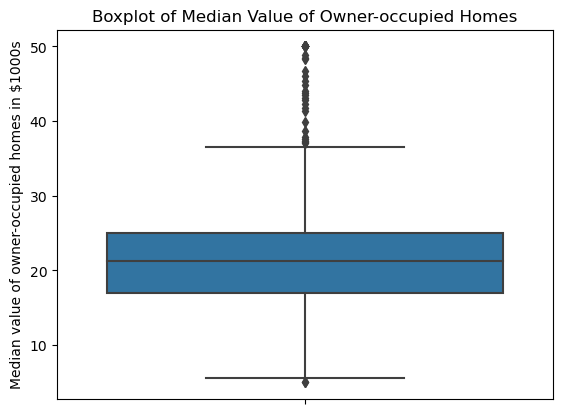

In [7]:
# Task 2: Generate Descriptive Statistics and Visualizations
# Q1: For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y = 'MEDV', data = df).set(title = 'Boxplot of Median Value of Owner-occupied Homes', ylabel='Median value of owner-occupied homes in $1000s')
ax

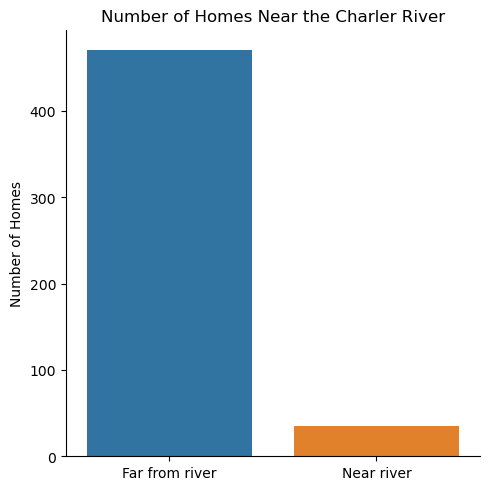

In [8]:
# Q2: Provide a bar plot for the Charles river variable
df.loc[df["CHAS"]==1,"CHAS_LABEL"] = "Near river"
df.loc[df["CHAS"]==0,"CHAS_LABEL"] = "Far from river"
ax = sns.catplot(x = 'CHAS_LABEL', kind = 'count', data = df)
ax.set(title = 'Number of Homes Near the Charler River')
ax.set_axis_labels("", "Number of Homes")
ax;

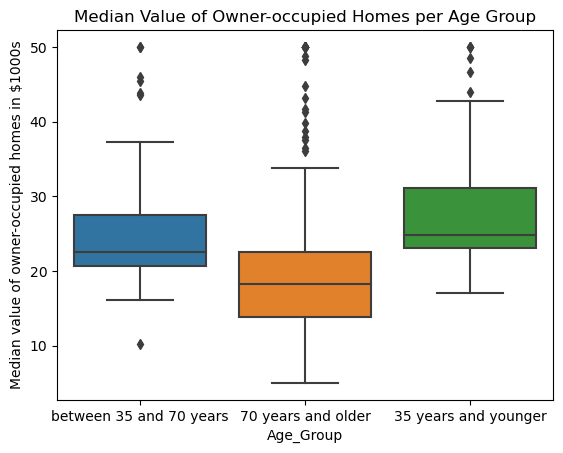

In [9]:
# Q3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
df.loc[(df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
df.loc[(df['AGE'] > 35) & (df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
df.loc[(df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

ax = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = df).set(title = 'Median Value of Owner-occupied Homes per Age Group', ylabel='Median value of owner-occupied homes in $1000s')

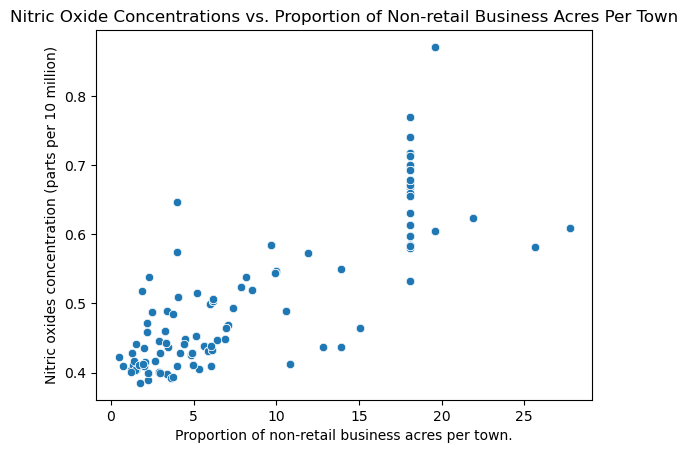

In [10]:
# Q4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x = 'INDUS', y = 'NOX', data = df).set(title = 'Nitric Oxide Concentrations vs. Proportion of Non-retail Business Acres Per Town', xlabel="Proportion of non-retail business acres per town.", ylabel="Nitric oxides concentration (parts per 10 million)")

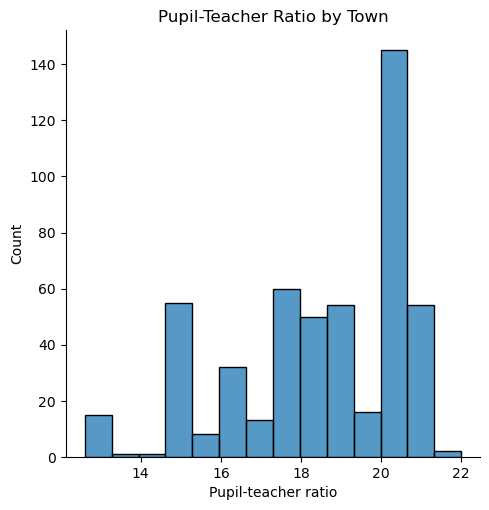

In [11]:
# Comment:
# A position correlation between nitric oxide concentrations and the proportion of non-retail business acres per town is observed. In other words, higher nitric oxide concentrations higer the proportion of non-retail business acres per town.
# Q5: Create a histogram for the pupil to teacher ratio variable
ax = sns.displot(df['PTRATIO'], kde = False).set(title = 'Pupil-Teacher Ratio by Town', xlabel="Pupil-teacher ratio")

In [12]:
# Task 3: Use the appropriate tests to answer the questions provided.
# Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# Hypothesis:
# Null hypothesis: there's no significant difference in median value of houses bounded by the Charles river or not
# Alternative hypothesis: there's a significant difference in median value of houses bounded by the Charles river or not

scipy.stats.ttest_ind(df[df['CHAS'] == 0]['MEDV'], 
                      df[df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion:
As the p-value is less than 0.05, we reject the null Hypothesis. Based on the test, we conclude on a 5% significance level that there is a significant difference in median value of houses bounded by the Charles river vs the rest.

In [13]:
# Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Hypothesis:
# Null hypotesis: there is no significant difference in median values of houses for each proportion of owner occpied units built prior to 1940
# Alternative hypothesis: there is a statistical difference in median values of houses for each proportion of owner occpied units built prior to 1940

model = ols('MEDV ~ AGE', data = df).fit()
anova_output = sm.stats.anova_lm(model)
print(anova_output)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Conclusion:
As the p-value is less than 0.05, we reject the null hypothesis. We conclude that on a 5% significance level there is a difference in median values of houses for each proportion of owner occupied units built prior to 1940.

In [14]:
# Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Hypothesis:
# Null hypothesis: There is no correlation between Nitric Oxide concentration and the proportion of non-retail business acres per town
# Alternative hypothesis: There is a correlation between Nitric Oxide concentration and the proportion of non-retail business acres per town
scipy.stats.pearsonr(df['NOX'], df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

Conclusion:
As the p-value is almost zero - and less than 0.05 in particular, we reject the null hypothesis. We conclude that on a 5% significance level there is a positive correlation between Nitric oxide concentration and the proportion of non-retail business acres per town

In [15]:
# Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
x = df['DIS']
y = df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        20:33:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:
For every unit of the "weighted distances to five Boston employment centres" (DIS), the median value of owner-occupied homes increases by ~\\$1092